<a href="https://colab.research.google.com/github/renatafrustockl/Bootcamp-IGTI---analista-de-Machine-Learning/blob/main/DESAFIO_FINAL_ML_RENATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [ ]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [ ]:
from IPython.display import Image
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
#liberando acesso do colab aos arquivos no drive
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving cars.csv to cars.csv


In [18]:
#lendo o csv que contem a base de dados e armazanando em um df
df = pd.read_csv('cars.csv')

In [19]:
#imprimindo as 5 primeiras linhas do df para confirmação
df.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [20]:
df.dtypes

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object

In [21]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', df.shape)

Amostras e Features: (261, 8)


In [22]:
# Analisando o resumo da base
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [23]:
#verificando a existência de dados nulos
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numéricoutilizando o pd.to_numeric(), utilizando o parâmetro errors='coerce'.

In [24]:
#Convertendo valores objects para numeric
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')

In [25]:
#Verificando resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [26]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas acompreender a variável “cubicinches” como string

In [27]:
indices_cub = [df[df['cubicinches'].isnull()]]
indices_cub

[      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year brand
 40   16.0          6          NaN  105     3897.0          19  1976   US.
 180  19.8          6          NaN   85     2990.0          18  1980   US.]

Substitua os valores nulos introduzidos no dataset após a transformação pelo valor médio dascolunas. Qual é o novo valor médio da coluna “weightlbs”

In [28]:
df['cubicinches'] = df['cubicinches'].fillna(df['cubicinches'].mean())
df['weightlbs'] = df['weightlbs'].fillna(df['weightlbs'].mean())

In [29]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [30]:
df['weightlbs'].mean()

3009.8333333333335

Pergunta 6 - Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?


In [31]:
df['mpg'].median()

22.0

In [ ]:

Desafio Final 1
Bootcamp Analista de Machine Learning @ IGTI

[ ]
↳ 4 células ocultas
Conhecendo o dataset
[ ]
↳ 6 células ocultas
Teste: Desafio Final
Pergunta 1 - Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar que:

[ ]
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64
Não foram encontrados valores nulos após a leitura dos dados.

Pergunta 2 - Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro errors='coerce'. Após essa transformação, é CORRETO afirmar:

[ ]
#Convertendo valores objects para numeric
cars['cubicinches'] = pd.to_numeric(cars['cubicinches'], errors='coerce')
cars['weightlbs'] = pd.to_numeric(cars['weightlbs'], errors='coerce')
[ ]
#Verificando resultado
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB
[ ]
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64
Essa transformação adiciona valores nulos ao nosso dataset.

Pergunta 3 - Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

[ ]
indices_cub = [cars[cars['cubicinches'].isnull()]]
indices_cub

[      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year brand
 40   16.0          6          NaN  105     3897.0          19  1976   US.
 180  19.8          6          NaN   85     2990.0          18  1980   US.]
Pergunta 4 - Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

[ ]
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64
Pergunta 5 - Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?

[ ]
cars['cubicinches'] = cars['cubicinches'].fillna(cars['cubicinches'].mean())
cars['weightlbs'] = cars['weightlbs'].fillna(cars['weightlbs'].mean())
[ ]
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64
[ ]
cars['weightlbs'].mean()

3009.8333333333335
Pergunta 6 - Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?

[ ]
cars['mpg'].median()

22.0
Pergunta 7 - Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

In [32]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


75% dos dados são maiores que o valor de 14,00.

Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar. EXCETO:

In [33]:

df[['cylinders', 'mpg']].corr().iloc[0,1]

-0.7767098829879984

In [35]:
from scipy import stats
stats.pearsonr(df['cylinders'], df['mpg'])

(-0.7767098829880001, 6.418952616909788e-54)

In [36]:
from sklearn.metrics import r2_score
r2_score(df['cylinders'], df['mpg'])

-130.3536562420295

Mesmo não sendo igual a 1, é possível dizer que à medida em que a variável “cylinders” aumenta, a variável “mpg” também aumenta na mesma direção.

In [ ]:
 9 - Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


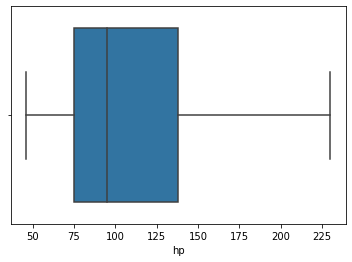

In [37]:
sns.boxplot(df['hp'])

Cada um dos quartis possui a mesma quantidade de valores para a variável “hp”. ou Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.

Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?

In [38]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [39]:
df_normalizar = df.drop('brand', axis=1)
df_normalizar.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [41]:
from sklearn.preprocessing import StandardScaler
normalizar = StandardScaler() #instanciando o standart scaler

scaler = normalizar.fit(df_normalizar.values) #fitando o dataset para normalizar

df_normalizado = scaler.transform(df_normalizar.values) #normalizando

df_normalizado = pd.DataFrame(df_normalizado, columns=df_normalizar.columns) #transformando o array numpy em data frame do pandas

In [42]:
df_normalizado['hp'].max()

3.05870398977614

Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeiracomponente principal?

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

In [49]:
principais = pca.fit_transform(df_normalizado)
pca.explained_variance_ratio_

array([0.72371349, 0.12675138, 0.09126131, 0.02773591, 0.01766794,
       0.00798425, 0.00488572])

 Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar que

In [ ]:
principais.explained_variance_ratio_

In [51]:
principais_componentes = pd.DataFrame(principais)
principais_componentes.head()

,0,1,2,3,4,5,6
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958


In [53]:
principais_componentes_k = principais_componentes.iloc[:, :3] #selecionando todas as linhas e as 3 primeiras colunas
principais_componentes_k.columns = ['componente 1', 'componente 2', 'componente 3']

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(principais_componentes_k) #Parâmetros dados no desafio

In [55]:
principais_componentes_k['cluster'] = kmeans.labels_ #adicionando coluna do cluster em que o carro está
principais_componentes_k

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,componente 1,componente 2,componente 3,cluster
0,3.485219,0.526326,-0.139738,1
1,-2.176912,-0.285424,-1.304613,0
2,2.684973,1.046946,-0.732156,1
3,3.534648,0.847619,-0.801334,1
4,-2.299222,0.194808,-0.221704,0
...,...,...,...,...
256,1.815679,-1.347280,0.468559,1
257,-2.713476,-0.100927,-0.820777,0
258,-0.053849,-1.582706,-0.285137,2
259,0.785386,1.182446,0.609715,2


In [56]:
principais_componentes_k['cluster'].value_counts() #Contando a quantidade de elementos dos clusters gerados

2    109
0     77
1     75
Name: cluster, dtype: int64

Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variávelde eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devemser considerados eficientes. Utilize as colunas ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada.

In [57]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [60]:
entradas = np.array(df[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60']])
saidas = np.array(df['mpg'] > 25).astype(int) #zero = maior, 1 = menor

In [61]:
entradas

array([[8.000e+00, 3.500e+02, 1.650e+02, 4.209e+03, 1.200e+01],
       [4.000e+00, 8.900e+01, 7.100e+01, 1.925e+03, 1.400e+01],
       [8.000e+00, 3.020e+02, 1.400e+02, 3.449e+03, 1.100e+01],
       ...,
       [6.000e+00, 2.320e+02, 1.120e+02, 2.835e+03, 1.500e+01],
       [6.000e+00, 2.320e+02, 1.000e+02, 3.288e+03, 1.600e+01],
       [6.000e+00, 2.500e+02, 1.050e+02, 3.353e+03, 1.500e+01]])

In [62]:
saidas

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(entradas, saidas, test_size=0.30, random_state=42)

In [64]:
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(random_state=42)

In [65]:
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred)
acuracia

0.8734177215189873

Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostradoanteriormente, é INCORRETO afirmar:

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[33,  8],
       [ 2, 36]])

Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes

15 - Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior,aplique o modelo de regressão logística como mostrado na descrição do trabalho. 
Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar que:

In [68]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42).fit(x_train, y_train)
logreg_y_pred = logreg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
accuracy_score(y_test, logreg_y_pred)

0.8607594936708861